<a href="https://colab.research.google.com/github/harrisb002/CS_479/blob/Labs/datatypes_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

In the previous lab we have seen how images can be imported in Python as Numpy arrays and what kind of operations we can do with these arrays. Here we give more information on some technical aspects of working with images. This will begin with how to have a fine control over displaying images, and then move on to discussing datatypes of images and ramifications on arithmetic operations.

## CAUTION

In all labs this semester, including this one, do not include any other library that is already in the Python environment created for this class. If you ever feel the need to import a different library, ask the instructor! Otherwise, the autograder will not identify your new libraries and fail your tests.

## Displaying images

There are several libraries that allow you to display images. Here we mainly use Matplotlib which you can use for other purposes and which is also used as basis for other libraries. Until now we have learned to import the library:

In [1]:
import matplotlib.pyplot as plt

And we have seen how we can display an image with ```imshow```:

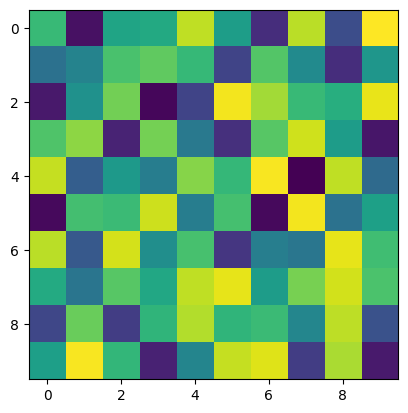

In [2]:
import numpy as np
plt.imshow(np.random.randint(0,255,(10,10)));

The above way of creating a figure is a sort of shortcut. The "correct" way of creating a figure that you should use if you want more control over it is:

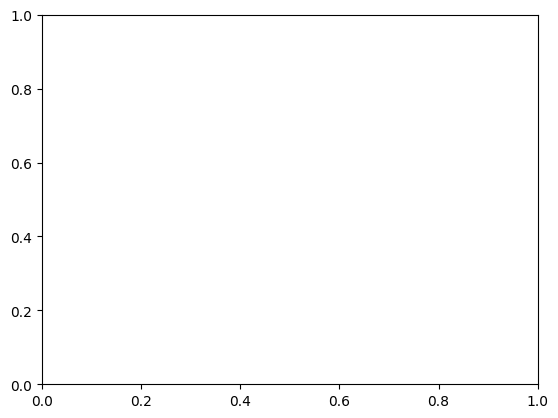

In [3]:
fig, ax = plt.subplots()

As you can see, the above commmand ```plt.subplots()``` creates an empty figure (with only one subplot) and returns two variables ```fig``` and ```ax```. ```fig``` is the *entire figure* which potentially could contain multiple parts. The ```ax``` variable represents the plot itself. Now instead of using ```plt.imshow``` we can use ```ax.imshow``` and finely control the rendering:

Text(0.5, 0, 'my label')

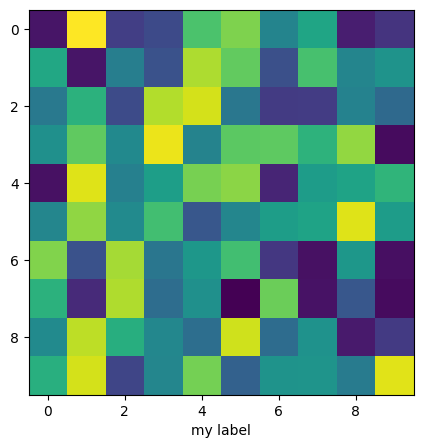

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.random.randint(0,255,(10,10)))
ax.set_xlabel('my label')


Above we have used:
- an optional parameter ```figsize``` with which we can set the size of the figure
- added an axis label using the ```set_xlabel``` method on ```ax```

You can decide on the formatting of your plots in the tiniest detail with Matplotlib. More information on subplots can be found at https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

Let us try another example but this time with 3 subplots in a single row

(3,)


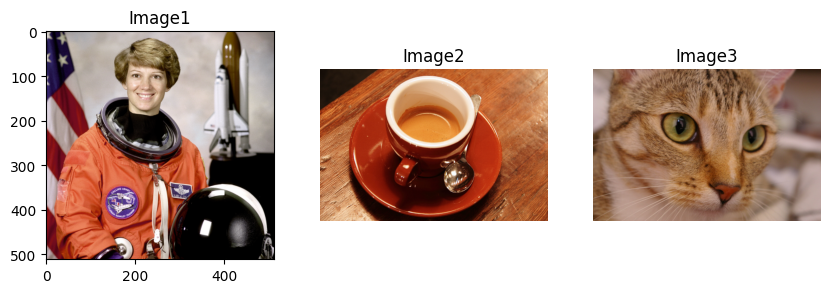

In [5]:
import skimage
from skimage import data

#load some images
img1 = data.astronaut()
img2 = data.coffee()
img3 = data.chelsea()

#combine them in a list of 3 numpy arrays (for ease of indexing below)
img = [img1, img2, img3]

#create 3 subplots.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

#The returned ax is a numpy array containing the list of created Axes.
#Since this figure has 1 row and 3 columns, ax will be a 1D array
#So we can access individual subplots using ax[0], ax[1], etc.
print(ax.shape)

#NOTE: using this line would create a figure with 2 rows and 2 columns.
#The returned ax would be a numpy array of shape (2, 2).
#Accordingly we can accessindividual subplots using ax[0, 0], ax[0, 1], etc.
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 3))


#ax.flat allows to flatten the array so that it can be iterated over (using a for-loop, for example)
#it is also possible to get all the subplots associated with the figure using fig.get_axes()
for i, aa in enumerate(ax.flat): #fig.get_axes() will also work
    aa.set_axis_off() #remove axis for each image
    aa.imshow(img[i]) #display each image
    aa.set_title('Image' + str(i + 1)) #set title

ax[0].set_axis_on() #set the axis back on for the first subplot

## Part A (5 points) - DEMO ONLY

 - Play with the *figsize* above. What do you observe as the numbers change?
 - Additionaly, load the camera image. And display the 4 images in 2 rows and 2 columns.
     - Note: the returned ax will *not* be a 1D numpy array anymore (why?)
 - Ensure that only the outer axes are labeled and that the images share both the x and y axes. See below for desired output.
 - When you are ready, demo your output to the instructor.

 ![Parta_output](part1_output.png)

(2, 2)


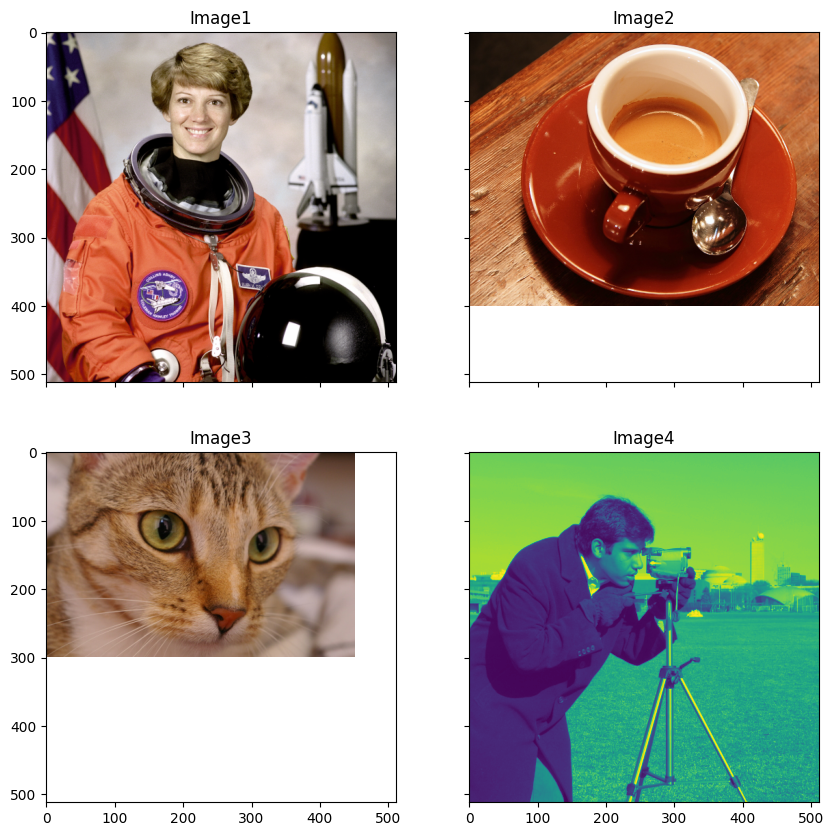

In [6]:
# YOUR CODE HERE

#Append camera to img array
img.append(data.camera())

#create 4 subplots. # Not a 1D array becuase nrows has been incremented
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)

for i, aa in enumerate(ax.flat):
  aa.imshow(img[i]) #display each image
  aa.set_title('Image' + str(i + 1)) #set title

print(ax.shape)



## Image histogram

We have seen in this week's lecture how the gray levels can be transformed (by adding a constant, by a multiplicative factor, by a stretching function, etc.). Another very common task is to look at the distribution of pixel intensities in the form of a histogram, i.e. count how many times each pixel value (or range) appears in an image and display it a a bar. This allows to get a quick estimate of the intensities present in an image and to check for problems like saturation.

We have already seen that we could use Matplotlib's ```imshow``` function to display an image. Now we look at a second plotting function from that library which generates such a histogram ```plt.hist()```. We want to compute the histogram on **all pixels** and for that we cannot use our 2D image as input. We first need to **flatten** the image into one long series of number. This can be done with the ```ravel()``` method of the array:

(303, 384)

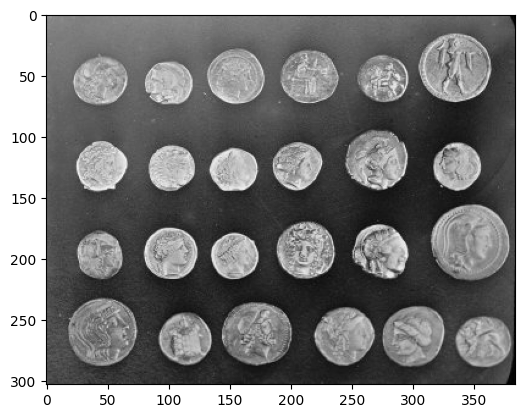

In [7]:
image = data.coins()
plt.imshow(image, cmap = 'gray')
image.shape

The expected length of the unfolded image is:

In [8]:
303 * 384

116352

In [9]:
image.ravel().shape

(116352,)

Now we can pass this unfolded version of the image to the histogram function:

(array([ 2921., 26971., 21621., 16475., 13331., 11734., 11920.,  8242.,
         2730.,   407.]),
 array([  1. ,  26.1,  51.2,  76.3, 101.4, 126.5, 151.6, 176.7, 201.8,
        226.9, 252. ]),
 <BarContainer object of 10 artists>)

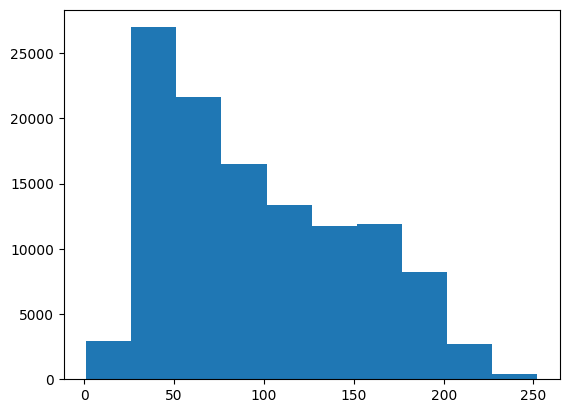

In [10]:
plt.hist(image.ravel()) #Note the output of this function being displayed below.

The [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function computes histogram with a default number of `10` bins.

What are bins? They indicate which graylevels should be grouped together when computing the histogram. For example, if `bins = 256`, then the frequency of each graylevel is computed independently. If `bins = 64`, then every four graylevels are grouped and frequency computed for each group. And so on...

11
[ 2921. 26971. 21621. 16475. 13331. 11734. 11920.  8242.  2730.   407.]


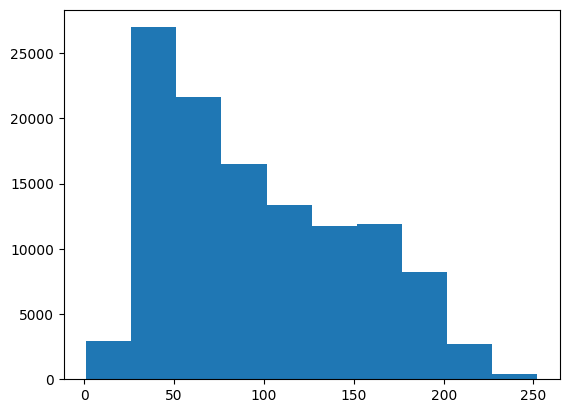

In [11]:
n, bins, _ = plt.hist(image.ravel())
print(len(bins))
print(n) #prints the pixel count in each bin

## Part B (5 points)

Write a function to compute histogram of an input image with fixed number of bins.

21
20


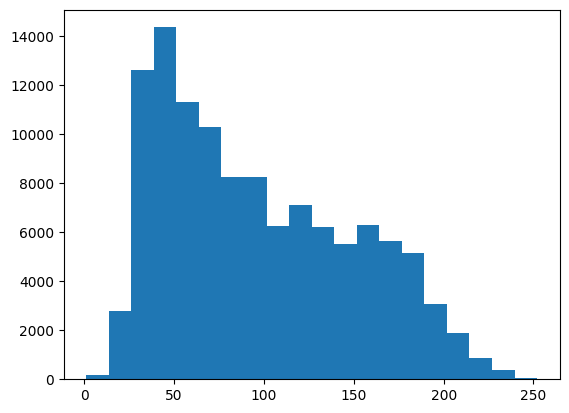

In [12]:
n, bins, _ = plt.hist(image.ravel(), bins=20)
print(len(bins))
print(len(n))

In [13]:
def computeHistogram(image, nBins):
    '''
    Computes the histogram of the input image with number of bins provided as a parameter.
    Returns a list containing the pixel count in each bin
    '''
    # YOUR CODE HERE
    n, bins, _ = plt.hist(image.ravel(), bins=nBins)
    return n

All Visible Tests Passed


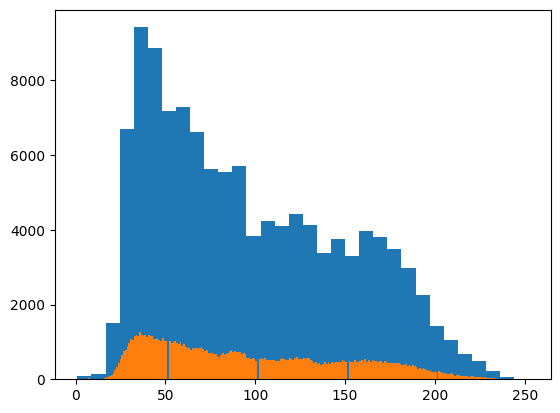

In [14]:
coin = data.coins()
n = computeHistogram(coin, 32)

assert(len(n) == 32)
assert(n[0] == 80)

n = computeHistogram(coin, 256)
assert(len(n) == 256)
assert(n[35] == 1264)

#Note this cell has some hidden tests that will test your code for different images and bins.
#To get credit, ensure that your code works for an arbitrary image and bins. In other words,
#Try your code on different images and match your histogram with a peer


print("All Visible Tests Passed")

## Image types

In the above historgram we see that our maximum value is around 250, actually it is:

In [15]:
image.max()

252

Has this number any meaning? Let's look at what type of numbers we have inside the array:

In [16]:
image.dtype

dtype('uint8')

The above output indicates that we have an unsigned 8-bit integer image. This means that the pixels can take all possible values between 0 and $2^8 = 256$ (not included). This is the reason why the maximum possible value in our array is 255.

We have to be somewhat careful with this. Let's look at a small portion of the image by cropping it:

In [17]:
image[0:3, 0:3]

array([[ 47, 123, 133],
       [ 93, 144, 145],
       [126, 147, 143]], dtype=uint8)

Now let us do some operation: we want to remove an estimated background that we here arbitrarily set at 40. We now have to subtract this value from each pixel in the image, so we do:

In [18]:
image[0:3, 0:3] - 40

array([[  7,  83,  93],
       [ 53, 104, 105],
       [ 86, 107, 103]], dtype=uint8)

All is fine, the value 40 has been subtracted from each pixel. Now let's imagine that the background has been estimated to 128:

In [19]:
image[0:3, 0:3] - 128

array([[175, 251,   5],
       [221,  16,  17],
       [254,  19,  15]], dtype=uint8)

Something strange happened: for example the original value 133 has indeed become 5, but the value 123 has become 251 ?!

The type of our array is 8 bit. This means that it can **only** take values between 0-255. So when we compute 123-128, we **cannot obtain a negative value**. What happens is that instead we subtract first 123, reach the value 0, and then essentially end-up at the other end of the possible range of values which which is 255 and then remove additionally 5 and end-up with the value 251.

We can see the strange result of such an operation by plotting:

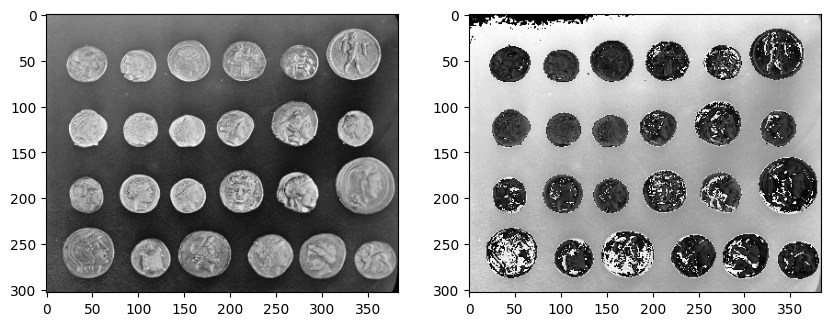

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(image-128, cmap = 'gray');

Note the coin in the bottom left where reducing the intensity by 128 has actually led it to become brighter! Not to mention that the already dark background has become brighter.

What can we do to fix this problem ? We have to change the type of our image so that it can accomodate this mathematical operation. For example we can turn it into a float image. For this we use the ```astype``` function:

In [21]:
import numpy as np

image_float = image.astype(np.float16)

In [22]:
#print their types
print(image.dtype, image_float.dtype)

uint8 float16


In [23]:
#print their minimum and max values
print(image.dtype, ':', image.min(), image.max())
print(image_float.dtype, ':', image_float.min(), image_float.max())

uint8 : 1 252
float16 : 1.0 252.0


In [24]:
image_float[0:3, 0:3]

array([[ 47., 123., 133.],
       [ 93., 144., 145.],
       [126., 147., 143.]], dtype=float16)

In [25]:
image_float[0:3, 0:3] - 128

array([[-81.,  -5.,   5.],
       [-35.,  16.,  17.],
       [ -2.,  19.,  15.]], dtype=float16)

Using the `astype` function does not change the values of the image (as one would expect). Another way to convert their type is to use the method `img_as_float` but it has an important side affect.

In [26]:
image_float2 = skimage.img_as_float(image)

In [27]:
#print their minimum and max values
print(image.dtype, ':', image.min(), image.max())
print(image_float2.dtype, ':', image_float2.min(), image_float2.max())

uint8 : 1 252
float64 : 0.00392156862745098 0.9882352941176471


Note the datatype of the converted image. Note, how the pixel values have been rescaled. The rescaling is simply a division by `255`.

In [28]:
image_float3 = image/255
#This print statement should give the exact output as the one above
print(image_float3.dtype, ':', image_float3.min(), image_float3.max())

float64 : 0.00392156862745098 0.9882352941176471


## Color spaces

## Part C (6 points)

We will use our understanding of datatypes to write a function that converts a color image to gray scale by simply  averaging the three channels:

`gray = (R + G + B)/3`

Side note: Is that how the `rgb2gray` of `skimage` library computes gray scale image?

In [29]:
    img = data.coffee()

    #Convert imgae to float
    image_float = skimage.img_as_float(img)

    # Averaging the three color channels.
    r = image_float[:,:,0]
    g = image_float[:,:,1]
    b = image_float[:,:,2]

    gray = (r+g+b)/3

    print(gray)


[[0.05490196 0.05620915 0.05098039 ... 0.71633987 0.72941176 0.72156863]
 [0.05359477 0.05620915 0.05359477 ... 0.71372549 0.7254902  0.71764706]
 [0.05490196 0.06013072 0.05620915 ... 0.71372549 0.71764706 0.72156863]
 ...
 [0.50980392 0.6248366  0.57254902 ... 0.37647059 0.37124183 0.3124183 ]
 [0.59738562 0.57777778 0.56601307 ... 0.34640523 0.32156863 0.31503268]
 [0.57254902 0.56339869 0.56078431 ... 0.35163399 0.31111111 0.30326797]]


In [30]:
def convertToGrayAndDisplay(img):
    '''
    converts an input color image img (with datatype uint8) into a gray scale by averaging the three color channels.
    displays the original image and the grayscale image in a subplot with 1 row and 2 columns.
    returns the gray scale image (with datatype float64)
    '''
    assert(img.shape[2] == 3) #Check there are three channels in the input image
    assert(img.dtype == 'uint8') #Check the input image is of type uint8

    # YOUR CODE HERE

    #Convert imgae to float
    image_float = skimage.img_as_float(img)

    # Averaging the three color channels.
    r = image_float[:,:,0]
    g = image_float[:,:,1]
    b = image_float[:,:,2]

    image_float = (r+g+b)/3

    images = [img, image_float]

    #create 2 subplots for each image
    fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(5,5), sharex=True, sharey=True)

    for i, aa in enumerate(ax.flat):
      aa.imshow(images[i]) #display each image
      aa.set_title('Image' + str(i + 1)) #set title

    return image_float



0.00130718954248366 1.0


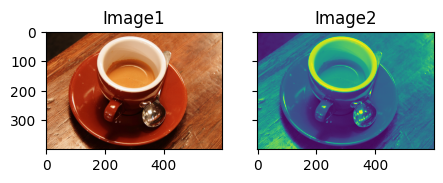

In [31]:
#some testing to ensure we are on the right path...

#load an image
img_color = data.coffee()
#Check that the function displays both the original image and the converted image without any distortions
img_gray = convertToGrayAndDisplay(img_color)
#Check that the minimum and maximum values are between 0 and 1
print(img_gray.min(), img_gray.max())
#check the type of the converted image (should be float64)
assert(img_gray.dtype == 'float64')

All Tests Passed


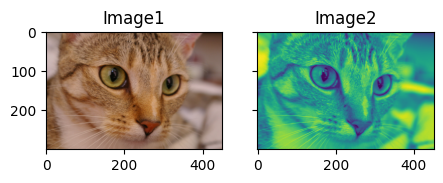

In [32]:
import math
img_color = data.chelsea()
img_gray = convertToGrayAndDisplay(img_color)

assert(math.isclose(img_gray.max(), 0.76209150326))
assert(math.isclose(img_gray.min(), 0.01176470588))
assert(img_gray.dtype == 'float64')
print("All Tests Passed")

In [33]:
#Some hidden tests below with a different image and different assert




Compare the result of the above function with the output of the [`rgb2gray`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) function

In [34]:
#helper function to find sum of absolute difference of pixels between two images
def sumPixelDifference(img1, img2):
    assert(img1.shape == img2.shape)
    return np.sum(np.abs(img1 - img2))

In [35]:
img_gray2 = skimage.color.rgb2gray(img_color)
diff = sumPixelDifference(img_gray, img_gray2)
#since rgb2gray function does not simply average the channels the difference between the images is non-zero!
assert(math.isclose(diff, 1442.713935555556))
print("All Tests Passed")

All Tests Passed


Look into the documentation of the `rgb2gray` function. What combination of R, G, B channels does it involve?

Compare with [HSV and YIQ color models](https://www.geeksforgeeks.org/difference-between-rgb-cmyk-hsv-and-yiq-color-models/).
- HSV: Hue, Saturation and Value are three channels. The value represents the intensity of the colour chosen.
   - HSV model is used in histogram equalization and converting grayscale images to RGB colour images.
- YIQ: Y stands for luminance part and IQ stands for chrominance part.
   - YIQ is the most widely colour model used in Television broadcasting.

## Part D (4 points)

Different color models produce a variation of the luminosity (intensity of color). Write a function that finds and returns the Y and V components from YIQ and HSV color models, respectively.

In [36]:
def getYV(img):

  '''
  Converts the input image img from RGB color space into HSV and YIQ spaces.
  Extracts the V component from HSV and Y component from YIQ.
  Returns them in a tuple (V, Y)
  '''
  # YOUR CODE HERE
  import skimage
  from skimage import color

  # Convert RGB image to HSV (V corresponds to the value which is intesity of color)
  hsv = color.rgb2hsv(img)

  # Extract V component from HSV
  V = hsv[:, :, 2]

  # Convert RGB image to YIQ
  yiq = color.rgb2yiq(img)

  # Extract Y component from YIQ (Y corresponds to the gray)
  Y = yiq[:, :, 0]

  return V, Y





Text(0.5, 1.0, 'V channel from HSV')

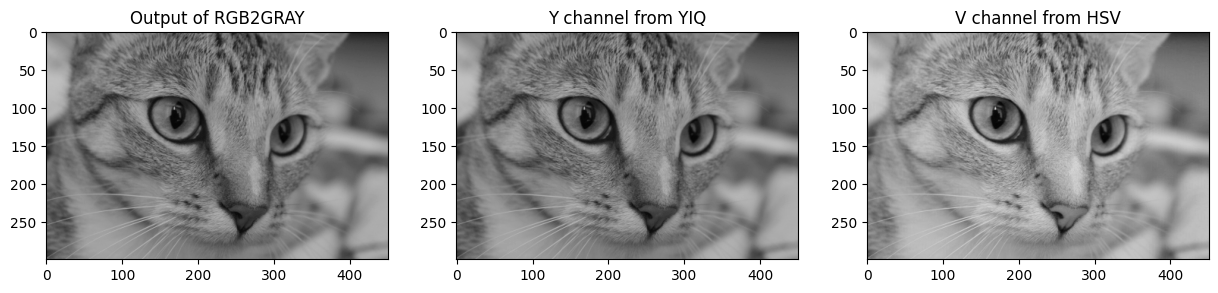

In [37]:
img_color = data.chelsea()
(img_V, img_Y) = getYV(img_color)

#Compare outputput of rgb2gray with Y (from YIQ) and V (from HSV)
#(since they all correspond to the intensity of color)

img_gray2 = skimage.color.rgb2gray(img_color)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Plot without rescaling values (otherwise imshow will remap the min to 0, and max to 1)
ax1.imshow(img_gray2, cmap = 'gray', vmin = 0, vmax = 1)
ax2.imshow(img_Y, cmap = 'gray', vmin = 0, vmax = 1)
ax3.imshow(img_V, cmap = 'gray', vmin = 0, vmax = 1)
ax1.set_title("Output of RGB2GRAY")
ax2.set_title("Y channel from YIQ")
ax3.set_title("V channel from HSV")

#Now change the image, and observe the change in output.. how different do these intensity channels look? Why?

In [38]:
img_color = data.chelsea()
(img_V, img_Y) = getYV(img_color)

img_gray2 = skimage.color.rgb2gray(img_color)

diff1 = sumPixelDifference(img_gray2, img_Y)
diff2 = sumPixelDifference(img_gray2, img_V)

assert(math.isclose(diff1, 1121.1601635294))
assert(math.isclose(diff2, 16085.110459999))

#Some hidden tests below with a different image


print("All Visible Tests Passed")

All Visible Tests Passed


## Part E (5 points - DEMO Only)

Write A FUNCTION that takes a color image as a parameter, and number of bins as a parameter. It converts the image into gray scale using RGB averaging, `rgb2gray` method, and using Y and V components of from the YIQ and HSV models.
 - It displays these 4 grayscale images in a 2 x 2 plot.
 - It then displays their histograms in a single plot. See an example to stack histograms of multiple data sets [here](https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py). Ensure the shape of your input is `(numPixels, 4)` (which corresponds to the `stack` of 4 images after unfolding).

Reflect: Which of the histograms of the 4 gray scale image is the most different from the rest? (Back your answer by **calling your function with different parameters**)

Example histogram output:
![Sample histogram output|5%](multiHist.png)



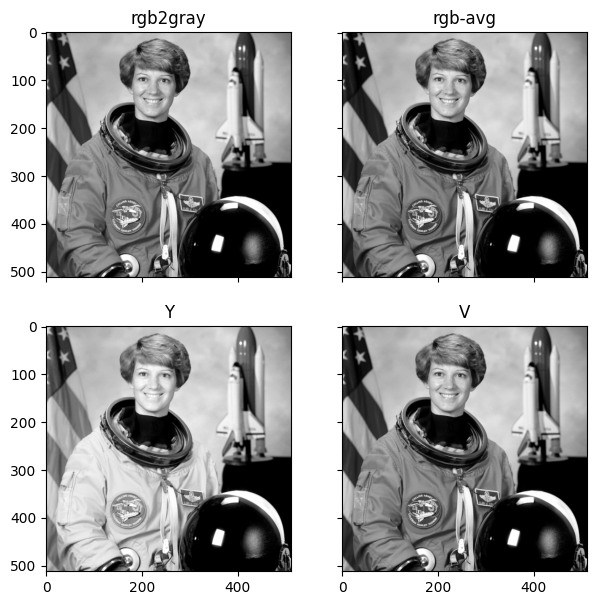

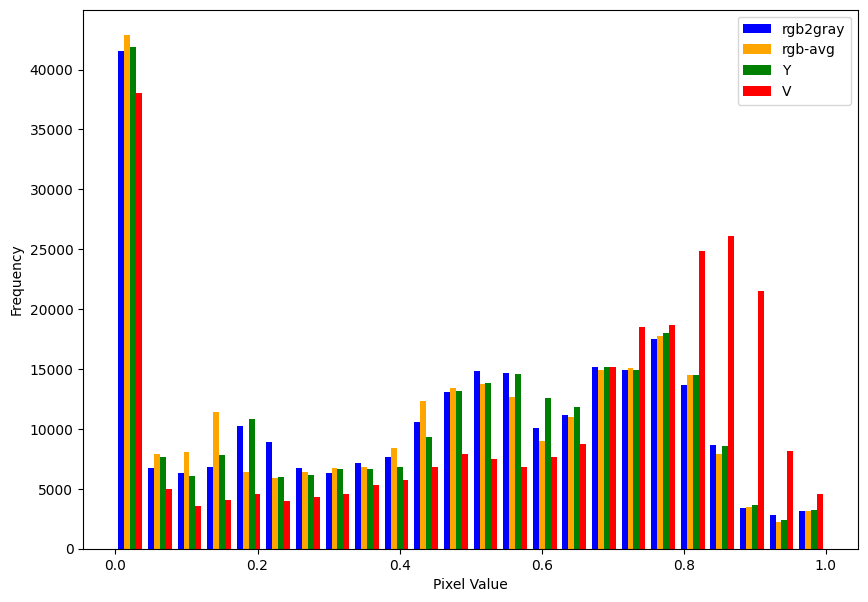

In [39]:
from skimage import color

def convert_and_plot_grayscale(img, nBins):

    # Convert to gray using RGB averaging
    averagingImage = skimage.img_as_float(img)

    # Averaging the three color channels.
    r = averagingImage[:, :, 0]
    g = averagingImage[:, :, 1]
    b = averagingImage[:, :, 2]
    averagingImage = (r + g + b) / 3

    # Convert the image to grayscale using skimage method
    gray_rgb = color.rgb2gray(img)

    # Convert the image to grayscale using Y component from YIQ model
    yiq_image = color.rgb2yiq(img)
    gray_yiq = yiq_image[:, :, 0]

    # Convert the image to grayscale using V component from HSV model
    hsv_image = color.rgb2hsv(img)
    gray_hsv = hsv_image[:, :, 2]

    #Create array of images
    images = [averagingImage, gray_rgb, gray_hsv, gray_yiq]
    img_names = ["rgb2gray","rgb-avg", "Y", "V"]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), sharex=True, sharey=True)

    # Plot values
    for i, aa in enumerate(ax.flat):
      aa.imshow(images[i], cmap='gray', vmin=0, vmax=1) #display each image
      aa.set_title(img_names[i]) #set title

    # Histogram
    # Create a list of arrays to store pixel values for each image
    pixel_arrays = [averagingImage.ravel(), gray_rgb.ravel(), gray_yiq.ravel(), gray_hsv.ravel()]
    img_names = ["rgb2gray", "rgb-avg", "Y", "V"]

    # Create a new figure for the stacked histograms
    plt.figure(figsize=(10, 7))

    # Define colors for histograms
    colors = ['blue', 'orange', 'green', 'red']

    #Plot Histogram
    plt.hist(pixel_arrays, nBins, density=False, histtype='bar', color=colors, label=img_names)
    plt.legend(prop={'size': 10})
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")


convert_and_plot_grayscale(data.astronaut(), 24)


Answer to the reflection question here:


Reflect: Which of the histograms of the 4 gray scale image is the most different from the rest? (Back your answer by calling your function with different parameters)

Response: I believe the one that stands out the most in terms of its distribution of pixel values is likely the V component for the HSV histogram. This becomes even more obvious if given the coffee image whereas the astronaut may only be slightly apparent of the differences. The great disparity in pixel distribution is mainly seen in the pixel values above .7 (meaning those that are the brightest) This may be the case becuase for the HSV value when converting the RGB image to grayscale using the Value component, it  effectively emphasized the brightness in the image for those of great saturation levels.